In [27]:
import pandas as pd
import numpy as np
import seaborn as sb
from scipy import stats

In [2]:
# import the data
data = pd.read_excel("./data/titanic3.xls")

df = data.copy()

In [3]:
#previeweing our dataset

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
#previewing the bottom of the dataset
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [5]:
# shape 
df.shape

(1309, 14)

In [6]:
# columns in our data 
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

## Data cleaning

#### 1. Data validation

In [7]:
#getting information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:
# renaming  home.dest

df = df.rename(columns = {"home.dest":"destination"})
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 2. Missing values

In [9]:
#check for missing values
df.isnull().sum()

pclass            0
survived          0
name              0
sex               0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
boat            823
body           1188
destination     564
dtype: int64

handling missing values

    - Drop the column
    
    - Filling in the missing values:
        - Some specific value
        - Filling using the previous value
        - Filling in using the next value 
        - Filling in using the mean value
        - Popular value

In [10]:
# dropping columns with any missing values
df.drop(columns= ["cabin", "body"], inplace=True)
df.isnull().sum()

pclass           0
survived         0
name             0
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             1
embarked         2
boat           823
destination    564
dtype: int64

In [11]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,NaN,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,NaN,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,NaN,NaN


30.0


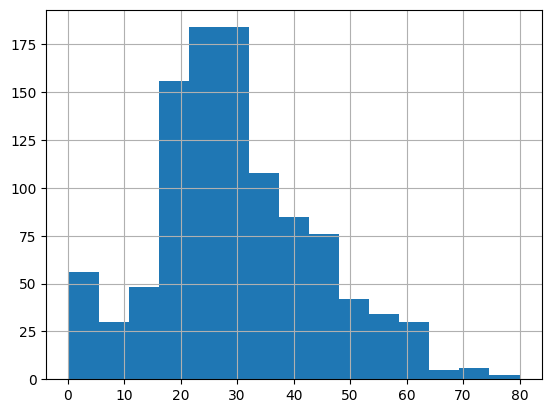

In [12]:
#drawing a histogra to get the context
df['age'].hist(bins=15)

print(df['age'].mean().round(0))

In [13]:
#filling in using the average age
df['age'].fillna(df['age'].mean(), inplace=True)

In [14]:
#using bfill
df['destination'] = df['destination'].bfill()

#getting the most popular value
df['destination'].value_counts()

#filling in using the most popular element
df['destination'] = df['destination'].fillna("Finland Sudbury, ON")

In [15]:
#using ffill
df['boat'] = df['boat'].ffill()

In [16]:
df['embarked'] = df.embarked.bfill()

In [17]:
df['fare'].fillna(df['fare'].mean(), inplace=True)

### Data types

data types 

    - String
    - Integer
    - Float
    - Boolean
    
Writing regex (regular expressions)

In [18]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"


In [19]:
#converting the age column to integer 
df['age'] = df['age'].astype(int)

### Outliers in python

This are extreme values found in numeric data.

Student marks

75, 34, 50, 55, 80, 2, 100

values that lie outside the 25 and 75 percentile 

can be detected visually using box plot

detecting outliers
- Visuallly using Histogras with KDEs and Boxplots
- Can be done mathematically usig Z-score

<AxesSubplot: >

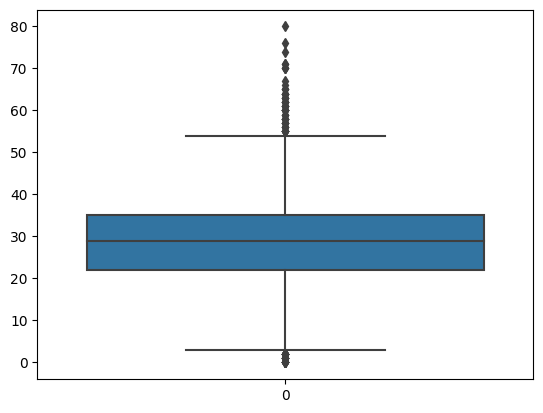

In [20]:
sb.boxplot(df['age'])

In [21]:
#summary statistics for age column
df['age'].describe()

count    1309.000000
mean       29.685256
std        12.899824
min         0.000000
25%        22.000000
50%        29.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64

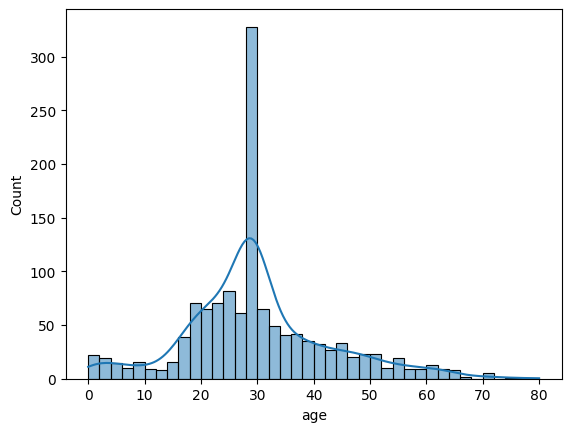

In [22]:
#plotting the histogram with a KDE

sb.histplot(data=df,x="age", kde=True, binwidth=2);

Z-score is also called the standard score

Understand how far a data value is from the mean. Threshold value -3 and 3

Zscore = (data_point - mean) / standard deviation

In [23]:
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"


In [24]:
age = df['age']

age_mean = age.mean()
age_std = age.std()

z_score = (29 - age_mean)/age_std

print(z_score)

-0.053121340611472986


In [26]:
z_score = (age.max() - age_mean)/age_std
print(z_score)

3.900421109646418


In [31]:
df['age_zscores'] = stats.zscore(age)

In [34]:
df.head(30)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,destination,age_zscores
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,S,2,"St Louis, MO",-0.053142
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON",-2.302094
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON",-2.146993
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON",0.024408
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON",-0.363342
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,S,3,"New York, NY",1.420310
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,S,10,"Hudson, NY",2.583561
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0.0000,S,10,"Belfast, NI",0.722359
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,S,D,"Bayside, Queens, NY",1.808060
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,C,D,"Montevideo, Uruguay",3.203961
